<a href="https://colab.research.google.com/github/RafiNaufalYassarRamadhan/F55121038_Rafi-Naufal-Yassar-Ramadhan/blob/main/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import library yang dibutuhkan
from keras.applications.efficientnet_v2 import EfficientNetV2M
from keras.applications.mobilenet_v2 import MobileNetV2

#Deklarasikan model yang akan dipakai
model = EfficientNetV2M()
#model = MobileNetV2()

#Tampilkan layer-layer model VGG16
model.summary()

219330792/219330792 [==============================] - 8s 0us/step
Model: "efficientnetv2-m"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 480, 480, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 480, 480, 3)  0           ['input_1[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 240, 240, 24  648         ['rescaling[0][0]']              
                                )                                                                 
                

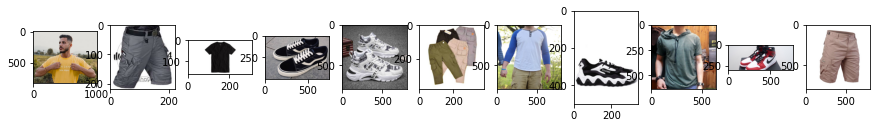

(11, 480, 480, 3)


In [ ]:
import requests
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

urls=[]
urls.append("https://laundry.drop.id/wp-content/uploads/2020/12/amir-babaei-0NK0FtJnIWE-unsplash-1024x821.jpg")
urls.append("https://p-id.ipricegroup.com/e6e3491130cff92795cc2a4f49e4f28a1d7cfe8c_0.jpg?position=6")
urls.append("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSFCWfxmWdPfDM4jMy59JUjPh3qblDIajSOzA&usqp=CAU")
urls.append("https://asset.kompas.com/crops/0goP7FKwWF1qhOgFdSg5Q9QEOXg=/14x0:547x355/750x500/data/photo/2020/02/03/5e37dfdc0013d.png")
urls.append("https://www.static-src.com/wcsstore/Indraprastha/images/catalog/full//92/MTA-18752230/no_brand_sepatu_pria_sp08_full01_uojh5quu.jpg")
urls.append("https://www.static-src.com/wcsstore/Indraprastha/images/catalog/medium//82/MTA-20111652/no_brand_celana_cargo_anak_laki_laki__full01_gszon1on.jpg")
urls.append("https://mas-kulin.com/wp-content/uploads/2019/09/03.-Kaos-Raglan.jpg")
urls.append("https://dynamic.zacdn.com/ibCzoV-ZUapBhEeY0PafC9mNV3o=/fit-in/346x500/filters:quality(90):fill(ffffff)/https://static-id.zacdn.com/p/panarybody-2968-5317342-1.jpg")
urls.append("https://media.karousell.com/media/photos/products/2018/07/17/kaos_distro_pria_kupluk_3_macam_1531786842_7e87ec06.jpg")
urls.append("https://storage.googleapis.com/ovo-prd-fs-edu-blog-static/cerdasfinansial/d82cc6db-harga-sepatu-jordan.png")
urls.append("https://www.static-src.com/wcsstore/Indraprastha/images/catalog/full//104/MTA-7432799/raung_adventure_raung_adventure_celana_pdl_pendek_-_celana_lapangan_pendek_-_celana_cargo_pendek_-_bahan_ripstok_ukuran_28-36_full06_gpwzbqmm.jpg")

imgs=[]
plt.figure(figsize=(15,6))
for u in range(0,len(urls)):
  r = requests.get(urls[u], stream=True) #Download
  img = np.array(Image.open(r.raw))  #Konversi ke NP Array
  plt.subplot(1,len(urls),u+1) #Menampilkan ke matplotlib
  plt.imshow(img) #Menampilkan ke matplotlib
  img = cv2.resize(img, (480,480)) #Resize sesuai input VGG 16
  imgs.append(img) #Kumpulkan semua image yang telah di preproses ke imgs
plt.show() #Menampilkan ke matplotlib
imgs = np.array(imgs) #Konversi ke Np Array 
print (imgs.shape) #Debuging (Apakah shape-nya benar?)

In [ ]:
yh = model.predict(imgs)
for i in range(len(urls)):
  if(np.argmax(yh[i]) >= 510 and np.argmax(yh[i])<=610 ):
      print("T-Shirt")
  elif(np.argmax(yh[i]) == 752  ) :
      print("Celana Pendek")
  elif(np.argmax(yh[i]) == 842  ) :
      print("Celana Pendek")
  elif(np.argmax(yh[i]) == 770):
      print("Sepatu") 
  
  else:
      print("Lainya")

1/1 [==============================] - 12s 12s/step
T-Shirt
Celana Pendek
T-Shirt
Sepatu
Sepatu
Celana Pendek
T-Shirt
Sepatu
T-Shirt
Sepatu
Celana Pendek


In [ ]:
np.argmax(yh[10])

770